#Unsupervised Clustering Experiment
* Author: Cody W. Eilar <cody.eilar@gmail.com> 
* Course: ECE 633
* Professor: Dr. Marios Pattichis

This is a simple experiment in which I read a certain number of megabytes from a video an attempt to do unsupervised clusterig. This is by no means a novel experiment, but it is used rather to become familiar with the OpenCV Python bindings, Scikit-learn, and numpy

In [1]:
from read_video import * 
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Time Critical Path
Reading in the video is going to be a very expensive operation. The following cell will take several seconds to execute because the program reas in `max_buf_size_mb` megabytes into memory. A conserative number is chosen here because the scikit-learn toolbox calculations will need to use about the same amount of memory to cacluate the clusters. 

In [4]:
video_to_read = "/Users/cody/test.mov"
max_buf_size_mb = 500; 
%time frame_buffer = ReadVideo(video_to_read, max_buf_size_mb)

CPU times: user 826 ms, sys: 235 ms, total: 1.06 s
Wall time: 5.7 s


In [5]:
frame_buffer.nbytes


218657280

## Plot First and Last Frames

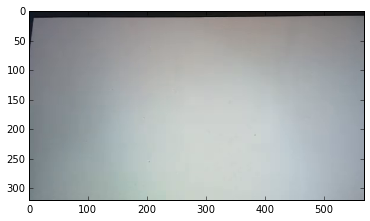

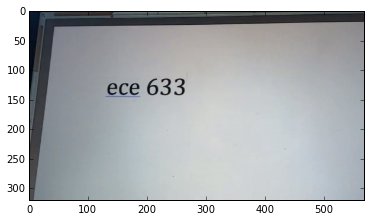

In [6]:
%matplotlib inline
#If you try to imshow doubles, it will look messed up.
plt.imshow(frame_buffer[0, :, :, :]); # Plot first frame
plt.show()
plt.imshow(frame_buffer[-1, :, :, :]); # Plot last frame
plt.show()


In [10]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Reshape the Data for Clustering
Like R, scikit learn needs to have data grouped in the form of `n_samples x n_features`. Here I reshape the data without copying any of it. In this case, I want to segment based on the contents of the frames so `n_samples = num_frames` and `n_features = pixel_values`. It is *very* important that data not be copied here, since copying video data is a very expensive operation. I've timed the function to prove to myself that I am just creating a new window into the data (i.e. pointers) and not copying anything. 

NOTE: I have included the color channels here as well. 

In [11]:
buf_s = frame_buffer.shape
K = buf_s[0] # Number of frames
M = buf_s[1]
N = buf_s[2]
chan = buf_s[3] # Color channel
%time scikit_buffer = frame_buffer.reshape([K, M*N*chan])
scikit_buffer.shape

CPU times: user 13 µs, sys: 1 µs, total: 14 µs
Wall time: 16.9 µs


(401, 545280)

##Begin Heavy Lifting
Up until this point, everything I have setup has been to get video data properly formatted and ready to ship to the clusting algorithm. Since I recorded the short video used in the example, I know exactly how many clusters I think there should be: 

1. Blank screen
2. e
3. c
4. e
5. 6
6. 3
7. 3

So exactly 7 clusters can be inferred from the video data. The code below is also a time critcal path, and takes quite a long time to compute. I've timed this function to prove to myself that it does indeed take quite some time. 

In [14]:
k_means = cluster.KMeans(n_clusters=7, n_init=1, copy_x=False)
%time k_means.fit(scikit_buffer)

CPU times: user 31.9 s, sys: 7.85 s, total: 39.7 s
Wall time: 31.5 s


KMeans(copy_x=False, init='k-means++', max_iter=300, n_clusters=7, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

## Analysis
As I had hoped, contiguous frames were clustered together but not without a few anomalies. Just from looking at the data, we can see that some clusters may have been misclassified, 1 and 5 for example towards the end of the array. 

In [15]:
labels = k_means.labels_
values = k_means.cluster_centers_.squeeze()
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4,

##Visualization of the Data
The only good way to visualize this data would be to look at the transitions from one classification to the other, i.e. when `current_classification != previous_classification`. If the clustering works, we should a distinc difference between the frame on the left and the frame on the right. 


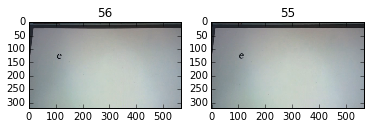

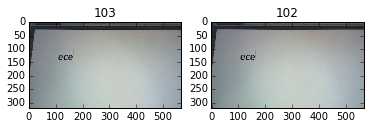

In [50]:
prev = labels[0]
plt_count = 0
for i in range(1, labels.size): 
    if (plt_count == 2): 
        break; 
    if (prev != labels[i]):
        plt.subplot(1,2,1); 
        plt.title(i)
        plt.imshow(frame_buffer[i, :, :, :])
        plt.subplot(1,2,2); 
        plt.title(i-1)
        plt.imshow(frame_buffer[i-1, :, :, :])
        plt.show()
        plt_count = plt_count + 1
    prev = labels[i]
        


As can be seen above, the results were not what I hypothesized. Just looking at frame 56 to 55, it is not clear why those frames were segmented differently. I've chosen only to show a subset of all the frames that had differences because none of them were classified how I thought they would be.